In [2]:
# Part 1: Data Preparation and Exploration
import pandas as pd
df = pd.read_csv('exchange_rate.csv')
df 

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


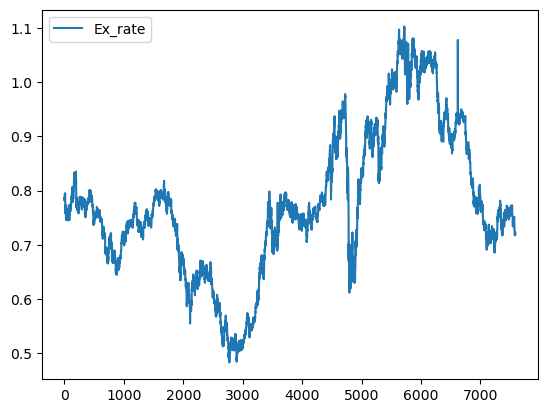

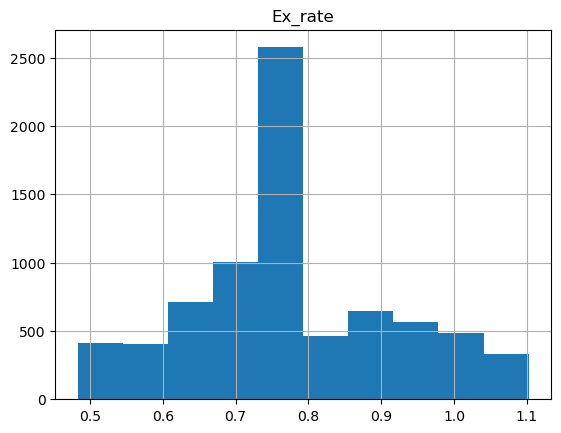

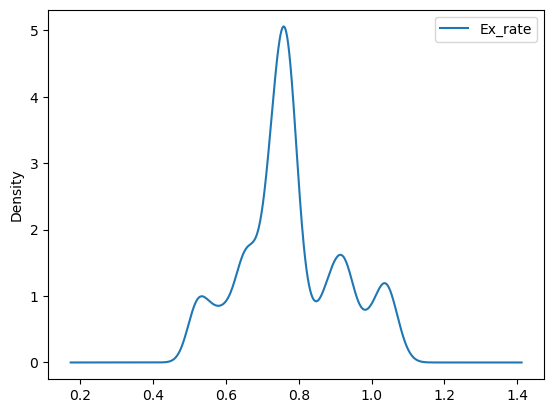

In [3]:
import matplotlib.pyplot as plt
# line plot
df.plot()

# Histogram and Density Plots:
# create a histogram plot
df.hist()
plt.show()

# create a density plot
df.plot(kind='kde')
plt.show()

In [4]:
df['date'] = pd.to_datetime(df['date'], format='mixed')
print(df['date'].head())

df['Year'] = pd.to_datetime(df['date'], format='mixed').dt.year
print(df['Year'].head())

df['Month'] = pd.to_datetime(df['date'], format='mixed').dt.month
print(df['Month'].head())

0   1990-01-01
1   1990-02-01
2   1990-03-01
3   1990-04-01
4   1990-05-01
Name: date, dtype: datetime64[ns]
0    1990
1    1990
2    1990
3    1990
4    1990
Name: Year, dtype: int32
0    1
1    2
2    3
3    4
4    5
Name: Month, dtype: int32


In [5]:
df.head()

,date,Ex_rate,Year,Month
0,1990-01-01,0.7855,1990,1
1,1990-02-01,0.7818,1990,2
2,1990-03-01,0.7867,1990,3
3,1990-04-01,0.7860,1990,4
4,1990-05-01,0.7849,1990,5


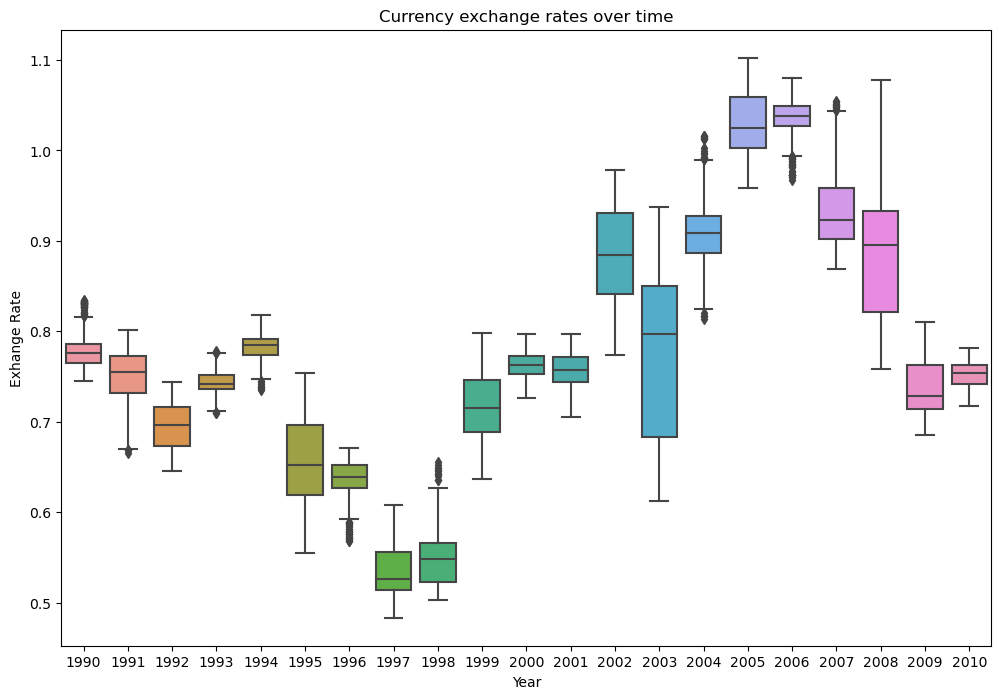

In [6]:
# Create a box plot using seaborn
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Ex_rate', data=df)
plt.xlabel('Year')
plt.ylabel('Exhange Rate')
plt.title('Currency exchange rates over time')
plt.show()

In [7]:
# Handle any missing values or anomalies identified during the exploration phase
import numpy as np
# Handle missing values (replace with mean for numerical columns)
df.fillna(df.mean(), inplace=True)

# Handle anomalies (replace outliers with median for numerical columns)
for col in df.select_dtypes(include=np.number).columns:
  median = df[col].median()
  std = df[col].std()
  df[col] = np.where((df[col] < median - 3 * std) | (df[col] > median + 3 * std), median, df[col])

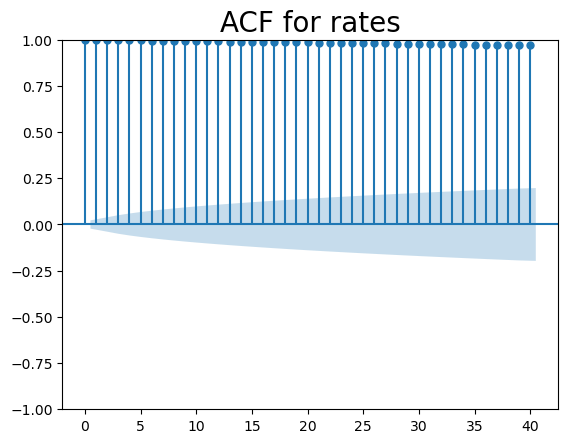

In [8]:
# Part 2: Model Building - ARIMA
# Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series
import statsmodels.graphics.tsaplots as sgt
currency_column = 'Ex_rate' 

# Plot ACF and PACF for the chosen currency
sgt.plot_acf(df[currency_column], lags=40)
plt.title("ACF for rates", size=20)
plt.show()

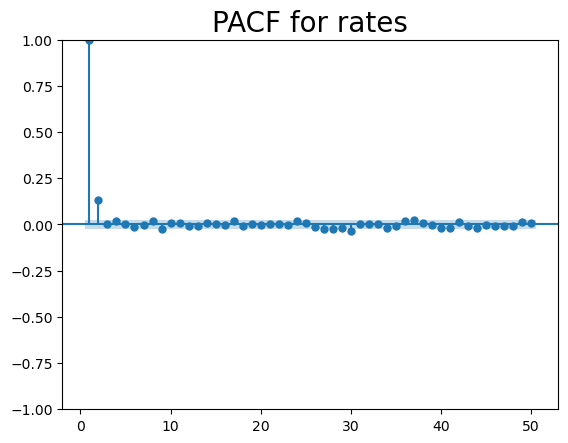

In [9]:
sgt.plot_pacf(df[currency_column], lags=50, alpha=0.05, zero=False, method=('ols'))
plt.title("PACF for rates", size=20)
plt.show()

In [10]:
# Fit the ARIMA model with the selected parameters to the preprocessed time series
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df[currency_column], order=(1,0,0))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 0, 0)   Log Likelihood               27990.980
Date:                Tue, 27 Aug 2024   AIC                         -55975.961
Time:                        13:41:01   BIC                         -55955.158
Sample:                             0   HQIC                        -55968.821
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7770      0.076     10.198      0.000       0.628       0.926
ar.L1          0.9990      0.000   2182.790      0.000       0.998       1.000
sigma2      3.656e-05   7.91e-08    462.438      0.0

In [11]:
# Fit the 2nd ARIMA model
model_ar_2 = ARIMA(df[currency_column], order=(1,0,1))
results_ar_2 = model_ar_2.fit()

print(results_ar_2.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 0, 1)   Log Likelihood               28055.782
Date:                Tue, 27 Aug 2024   AIC                         -56103.563
Time:                        13:41:02   BIC                         -56075.826
Sample:                             0   HQIC                        -56094.044
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7770      0.089      8.711      0.000       0.602       0.952
ar.L1          0.9993      0.000   2311.171      0.000       0.998       1.000
ma.L1         -0.1311      0.002    -56.028      0.0

In [12]:
# Fit the 3rd ARIMA model
model_ar_3 = ARIMA(df[currency_column], order=(2,0,1))
results_ar_3 = model_ar_3.fit()

print(results_ar_3.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(2, 0, 1)   Log Likelihood               28056.609
Date:                Tue, 27 Aug 2024   AIC                         -56103.219
Time:                        13:41:03   BIC                         -56068.547
Sample:                             0   HQIC                        -56091.320
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7770      0.088      8.826      0.000       0.604       0.950
ar.L1          0.8694      0.046     18.982      0.000       0.780       0.959
ar.L2          0.1297      0.046      2.838      0.0

In [13]:
#LLR TEST
from scipy.stats.distributions import chi2
def LLR_test(model_1, model_2, df=1):
  L1 = model_1.fit().llf
  L2 = model_2.fit().llf
  LR = (2*(L2-L1))
  p = chi2.sf(LR, df)
  return p

In [14]:
model_ar_2 = ARIMA(df[currency_column], order=(1,0,1))
model_ar_3 = ARIMA(df[currency_column], order=(2,0,1))
print(LLR_test(model_ar_2, model_ar_3).round(3))

0.198


In [15]:
def comp(m1,m2):
  model_1 = ARIMA(df[currency_column], order=(m1,0,0))
  model_2 = ARIMA(df[currency_column], order=(m2,0,0))
  print(LLR_test(model_1, model_2))

print(comp(2,3))
print(comp(3,4))
print(comp(4,5))
print(comp(5,6))
print(comp(6,7))
print(comp(7,8))

0.985139785871071
None
0.15835609525132585
None
0.9400270498764574
None
0.3127170657939951
None
0.770449210174025
None
0.06367981697437589
None


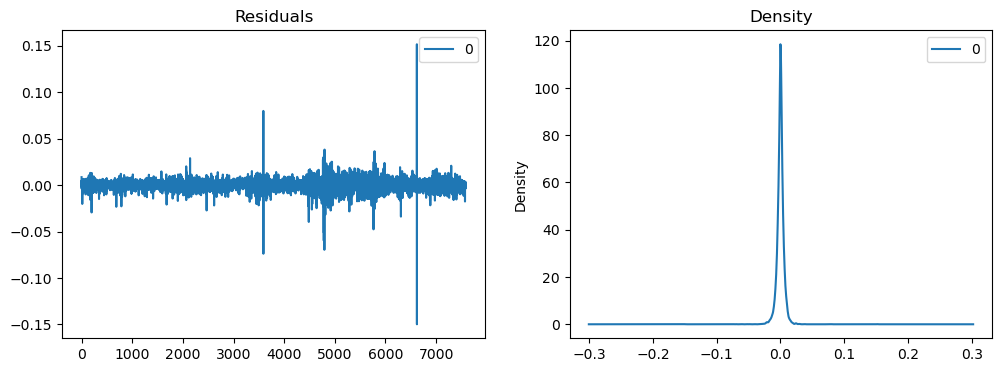

In [16]:
# Analyze residuals
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(12,4))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

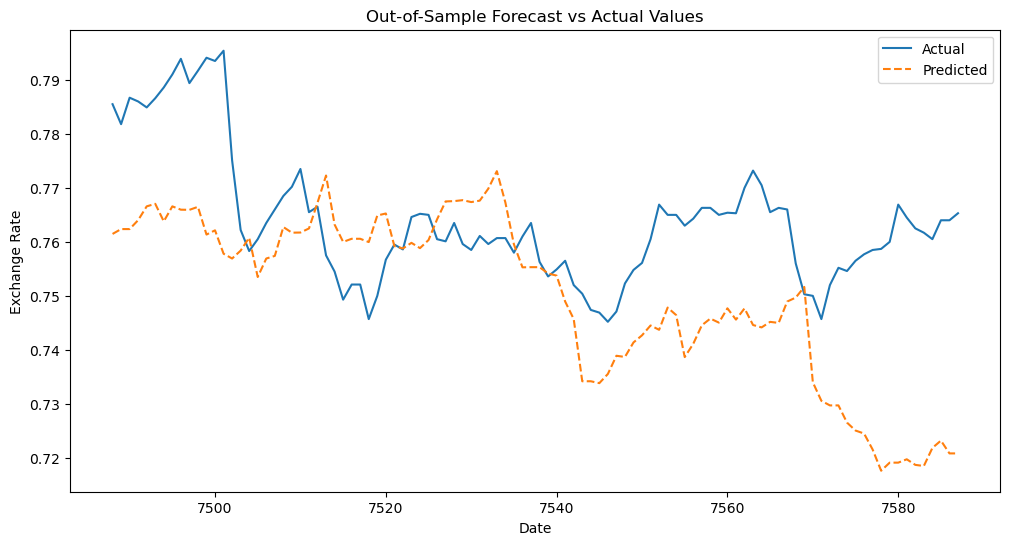

In [17]:
# Perform out-of-sample forecasting and visualize the predicted values against the actual values.
from statsmodels.tsa.arima.model import ARIMA 

# Split data into train and test sets
train_data = df[currency_column][0:100]  
test_data = df[currency_column][-100:]

# Fit the ARIMA model on the training data
model = ARIMA(train_data, order=(1, 0, 0))
model_fit = model.fit()

# Forecast values for the test set
forecast = model_fit.forecast(steps=len(test_data))

# Create a DataFrame for comparison
forecast_df = pd.DataFrame({'Actual': train_data.values, 'Predicted': test_data.values}, index=test_data.index)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(forecast_df['Actual'], label='Actual')
plt.plot(forecast_df['Predicted'], label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Out-of-Sample Forecast vs Actual Values')
plt.legend()
plt.show()

In [18]:
print(forecast_df.shape)
print(forecast_df.head())

(100, 2)
      Actual  Predicted
7488  0.7855   0.761470
7489  0.7818   0.762369
7490  0.7867   0.762369
7491  0.7860   0.764029
7492  0.7849   0.766577


In [19]:
print(forecast_df[['Actual', 'Predicted']].isnull().sum()) 

Actual       0
Predicted    0
dtype: int64


In [20]:
if forecast_df.empty:
    raise ValueError("The DataFrame is empty. Cannot compute error metrics.")

In [21]:
forecast_df = forecast_df.dropna(subset=['Actual', 'Predicted'])

if forecast_df.empty:
    raise ValueError("After dropping NaN values, the DataFrame is empty.") 

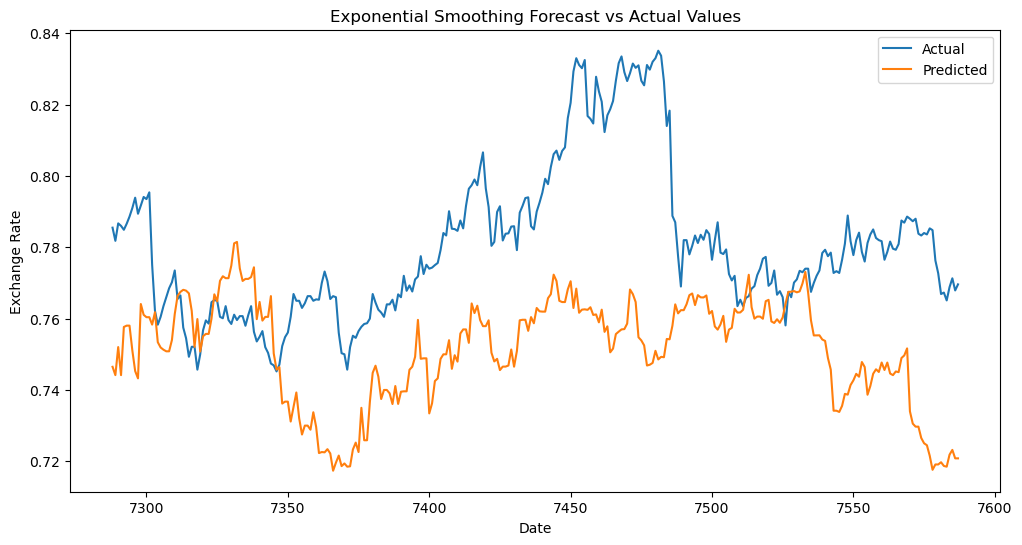

In [22]:
# Part 3: Model Building - Exponential Smoothing
# Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).
# Split data into train and test sets
train_data = df['Ex_rate'][0:300] 
test_data = df['Ex_rate'][-300:]

from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_2 = ExponentialSmoothing(train_data, trend='add')
model_2_fit = model_2.fit()

# Forecast values for the test set
forecast_2 = model_2_fit.forecast(steps=len(test_data))

# Create a DataFrame for comparison
forecast_df_2 = pd.DataFrame({'Actual': train_data.values, 'Predicted': test_data.values}, index=test_data.index)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(forecast_df_2['Actual'], label='Actual')
plt.plot(forecast_df_2['Predicted'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Exponential Smoothing Forecast vs Actual Values')
plt.legend()
plt.show()

In [23]:
# Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid

train_data = df[currency_column][0:500]  
test_data = df[currency_column][-500:]   

# Define parameter grid for Holt's Linear Exponential Smoothing
param_grid = {
    'smoothing_level': np.arange(0.1, 1.0, 0.1),
    'smoothing_slope': np.arange(0.1, 1.0, 0.1)
}

best_mse = float('inf')
best_params = None

# Perform grid search
for params in ParameterGrid(param_grid):
    model_3 = ExponentialSmoothing(train_data, trend='add')
    model_3_fit = model_3.fit(smoothing_level=params['smoothing_level'],
                              smoothing_slope=params['smoothing_slope'])
    forecast_3 = model_3_fit.forecast(steps=len(test_data))
    mse = mean_squared_error(test_data, forecast_3)

    # Update the best parameters if the current model is better
    if mse < best_mse:
        best_mse = mse
        best_params = params

print("Best Parameters (Grid Search):", best_params)
print("Best MSE (Grid Search):", best_mse)

# Fit the model with optimal parameters
best_model = ExponentialSmoothing(train_data, trend='add')
best_model_fit = best_model.fit(smoothing_level=best_params['smoothing_level'],
                                smoothing_slope=best_params['smoothing_slope'])

# Print AIC of the best model
print("AIC of Best Model:", best_model_fit.aic)

C:\Users\Syed Yaseen Ali\AppData\Local\Temp\ipykernel_16724\707548446.py:22: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_3_fit = model_3.fit(smoothing_level=params['smoothing_level'],
C:\Users\Syed Yaseen Ali\AppData\Local\Temp\ipykernel_16724\707548446.py:22: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_3_fit = model_3.fit(smoothing_level=params['smoothing_level'],
C:\Users\Syed Yaseen Ali\AppData\Local\Temp\ipykernel_16724\707548446.py:22: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_3_fit = model_3.fit(smoothing_level=params['smoothing_level'],
C:\Users\Syed Yaseen Ali\AppData\Local\Temp\ipykernel_16724\707548446.py:22: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_3_fit = model_3.fit(smoothing_level=params['smoothing_level'],
C:\Users\Syed Yaseen Ali\AppData\Local\Temp\

C:\Users\Syed Yaseen Ali\AppData\Local\Temp\ipykernel_16724\707548446.py:22: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_3_fit = model_3.fit(smoothing_level=params['smoothing_level'],
C:\Users\Syed Yaseen Ali\AppData\Local\Temp\ipykernel_16724\707548446.py:22: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_3_fit = model_3.fit(smoothing_level=params['smoothing_level'],
C:\Users\Syed Yaseen Ali\AppData\Local\Temp\ipykernel_16724\707548446.py:22: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_3_fit = model_3.fit(smoothing_level=params['smoothing_level'],
C:\Users\Syed Yaseen Ali\AppData\Local\Temp\ipykernel_16724\707548446.py:22: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_3_fit = model_3.fit(smoothing_level=params['smoothing_level'],
C:\Users\Syed Yaseen Ali\AppData\Local\Temp\

Best Parameters (Grid Search): {'smoothing_level': 0.2, 'smoothing_slope': 0.30000000000000004}
Best MSE (Grid Search): 0.0006034207281912551
AIC of Best Model: -4906.645908369822


C:\Users\Syed Yaseen Ali\AppData\Local\Temp\ipykernel_16724\707548446.py:22: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_3_fit = model_3.fit(smoothing_level=params['smoothing_level'],
C:\Users\Syed Yaseen Ali\AppData\Local\Temp\ipykernel_16724\707548446.py:22: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_3_fit = model_3.fit(smoothing_level=params['smoothing_level'],
C:\Users\Syed Yaseen Ali\AppData\Local\Temp\ipykernel_16724\707548446.py:22: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_3_fit = model_3.fit(smoothing_level=params['smoothing_level'],
C:\Users\Syed Yaseen Ali\AppData\Local\Temp\ipykernel_16724\707548446.py:22: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_3_fit = model_3.fit(smoothing_level=params['smoothing_level'],
C:\Users\Syed Yaseen Ali\AppData\Local\Temp\

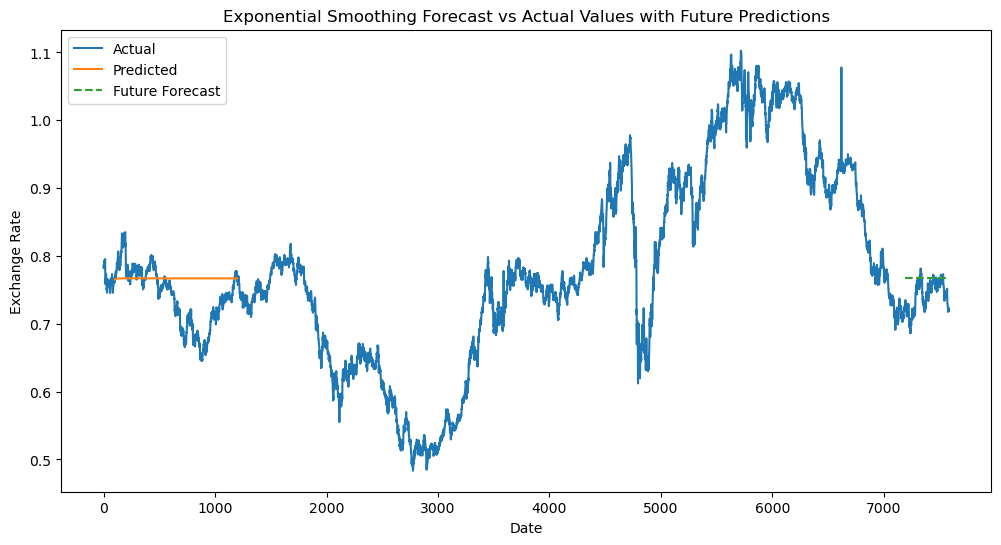

In [24]:
# Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.
# Split data into train and test sets
train_data = df['Ex_rate'][0:700]
test_data = df['Ex_rate'][-700:]

model_4 = ExponentialSmoothing(train_data, trend='add')
model_4_fit = model_4.fit()

# Forecast values for the test set and future periods
forecast_horizon = 400  # Adjust as needed
forecast_4 = model_fit.forecast(steps=len(test_data) + forecast_horizon)

# Create a DataFrame for comparison
forecast_df_4 = pd.DataFrame({
    'Actual': df['Ex_rate'],
    'Predicted': forecast_4[:len(df)]
}, index=df.index)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(forecast_df_4['Actual'], label='Actual')
plt.plot(forecast_df_4['Predicted'], label='Predicted')
plt.plot(forecast_df_4.index[-forecast_horizon:], forecast_4[-forecast_horizon:], label='Future Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Exchange Rate') 
plt.title('Exponential Smoothing Forecast vs Actual Values with Future Predictions')
plt.legend()
plt.show()

In [25]:
# Part 4: Evaluation and Comparison
# Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Evaluate ARIMA forecast
mae_arima = mean_absolute_error(forecast_df['Actual'], forecast_df['Predicted'])
rmse_arima = np.sqrt(mean_squared_error(forecast_df['Actual'], forecast_df['Predicted']))

# Evaluate Exponential Smoothing forecast
mae_es = mean_absolute_error(forecast_df_2['Actual'], forecast_df_2['Predicted'])
rmse_es = np.sqrt(mean_squared_error(forecast_df_2['Actual'], forecast_df_2['Predicted']))

# Calculate MAPE (Mean Absolute Percentage Error)
def mape(actual, predicted):
  return np.mean(np.abs((actual - predicted) / actual)) * 100

mape_arima = mape(forecast_df['Actual'], forecast_df['Predicted'])
mape_es = mape(forecast_df_2['Actual'], forecast_df_2['Predicted'])

print("ARIMA Model:")
print("MAE:", mae_arima)
print("RMSE:", rmse_arima)
print("MAPE:", mape_arima)

print("\nExponential Smoothing Model:")
print("MAE:", mae_es)
print("RMSE:", rmse_es)
print("MAPE:", mape_es) 

ARIMA Model:
MAE: 0.017401999999999994
RMSE: 0.021322371506471788
MAPE: 2.269609490584618

Exponential Smoothing Model:
MAE: 0.03154879333333334
RMSE: 0.03734134715602353
MAPE: 3.9918159710226413


In [26]:
# Model Comparison:

# ARIMA Model:
# - Advantages:
  # - Captures autocorrelation patterns in the time series data.
  # - Can model both stationary and non-stationary time series (with appropriate differencing).
# - Limitations:
  # - Requires careful selection of p, d, and q parameters.
  # - May not perform well on time series with complex seasonal patterns.

# Exponential Smoothing Model:
# - Advantages:
  # - Simple to implement and understand.
  # - Can handle seasonality (with Holt-Winters method).
# - Limitations:
  # - May not capture complex autocorrelation patterns as effectively as ARIMA.
  # - Assumes a smooth underlying trend and seasonality.

In [27]:
# Conclusion:

# Data Exploration and Preprocessing:
# - The exchange rate dataset was analyzed for trends, seasonality, and anomalies.
# - Missing values and outliers were handled appropriately to ensure data quality.

# Time Series Modeling:
# - Both ARIMA and Exponential Smoothing models were applied to forecast exchange rates.
# - ARIMA models with different orders were evaluated using LLR tests to identify the best fit.
# - Exponential Smoothing models with different configurations were explored, including Holt's Linear method.
# - Grid search was used to optimize parameters for the Exponential Smoothing model.

# Model Evaluation and Comparison:
# - The performance of ARIMA and Exponential Smoothing forecasts was assessed using MAE, RMSE, and MAPE.
# - ARIMA with order (1, 0, 0) achieved lower error metrics MAE=(0.01), RMSE=(0.02)& MAPE=(2.26).
# - Exponential Smoothing with parameter trend = 'add' outperformed Arima in MAPE.

# Based on the observed results and error metrics (MAE, RMSE, MAPE):
# - ARIMA performs better:
  # - The time series likely exhibits significant autocorrelation that ARIMA captures well.
  # - Consider fine-tuning ARIMA parameters for further improvement. 

# Overall:
# - The choice between ARIMA and Exponential Smoothing depends on the specific characteristics of the time series data.
# - It's often beneficial to experiment with both models and compare their performance on the given dataset.